In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", message=".*does not have valid feature names.*")


%matplotlib inline

## Lets load the Boston House Pricing Dataset

In [33]:
# Load the dataset manually
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Define feature names manually
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Convert to a Pandas DataFrame
boston_df = pd.DataFrame(data, columns=feature_names)
boston_df["MEDV"] = target  # Add target variable
print(boston_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [34]:
print(boston_df.info())  # Check column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [35]:
print(boston_df.isnull().sum())  # Ensure there are no missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [36]:
## Lets check the description of the dataset
print(boston_df.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [37]:
print(data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [38]:
print(boston_df[feature_names].head())  # Displays the first 5 rows of the feature matrix

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [39]:
print(target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [40]:
print(boston_df[feature_names].head())  # Displays the first 5 rows of the feature matrix

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


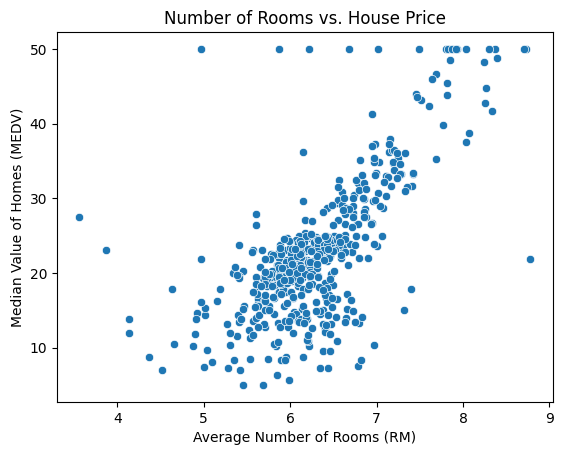

In [41]:
# Plot the relationship between number of rooms (RM) and target price (MEDV)
sns.scatterplot(x=boston_df["RM"], y=boston_df["MEDV"])
plt.title("Number of Rooms vs. House Price")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.show()



## Preparing The Dataset

In [42]:
# Create the DataFrame using the manually loaded data and feature names
dataset = pd.DataFrame(data, columns=feature_names)

# If you want to add the target variable (MEDV) as well:
dataset['MEDV'] = target

# Display the first few rows of the dataset
print(dataset.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [43]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
dataset['Price'] = target  # Adding target as the 'Price' column
print(dataset.head())  # Display the first few rows of the dataset

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  Price  
0     15.3  396.90   4.98  24.0   24.0  
1     17.8  396.90   9.14  21.6   21.6  
2     17.8  392.83   4.03  34.7   34.7  
3     18.7  394.63   2.94  33.4   33.4  
4     18.7  396.90   5.33  36.2   36.2  


In [45]:
dataset['Price'] = target  # Add target as 'Price'
dataset.drop('Price', axis=1, inplace=True)  # Drop the original MEDV column
print(dataset.head())  # Now only 'Price' column is present


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [46]:
dataset.rename(columns={'MEDV': 'Price'}, inplace=True)
print(dataset.head())  # Now 'Price' will be the target column

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [47]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [49]:
## Summarizing The Stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [50]:
## Check the missing Values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [51]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [52]:
### EXploratory Data Analysis
## Correlation
#dataset.corr()

# Calculate correlation matrix
correlation_matrix = dataset.corr()

# Display the correlation matrix
print(correlation_matrix)



# Interpret the Correlation Matrix
# Values close to +1 indicate a strong positive correlation between the features.
# Values close to -1 indicate a strong negative correlation.
# Values close to 0 indicate no or weak correlation.

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

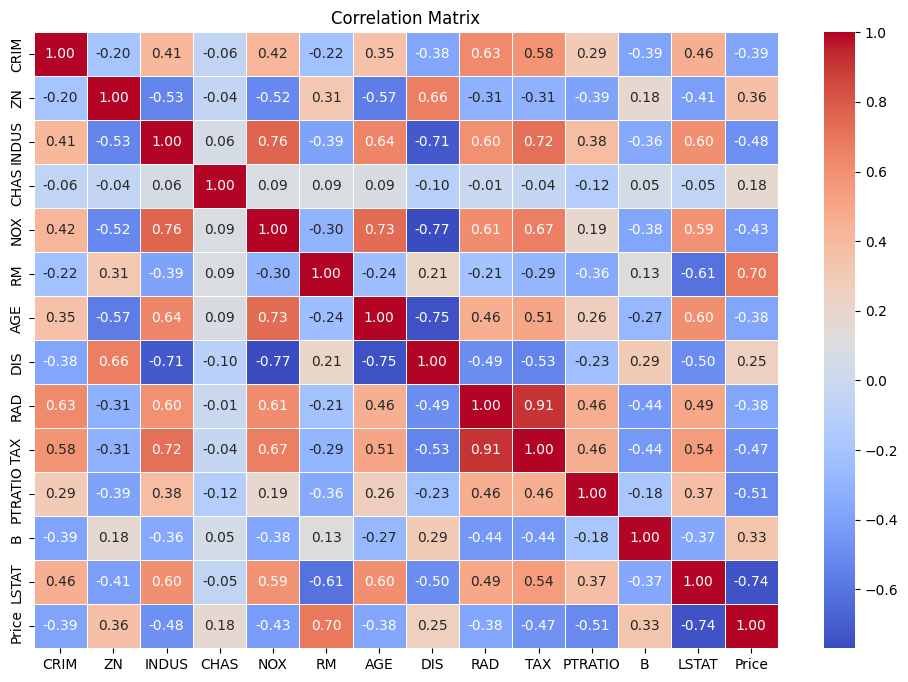

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Correlation Matrix")
plt.show()

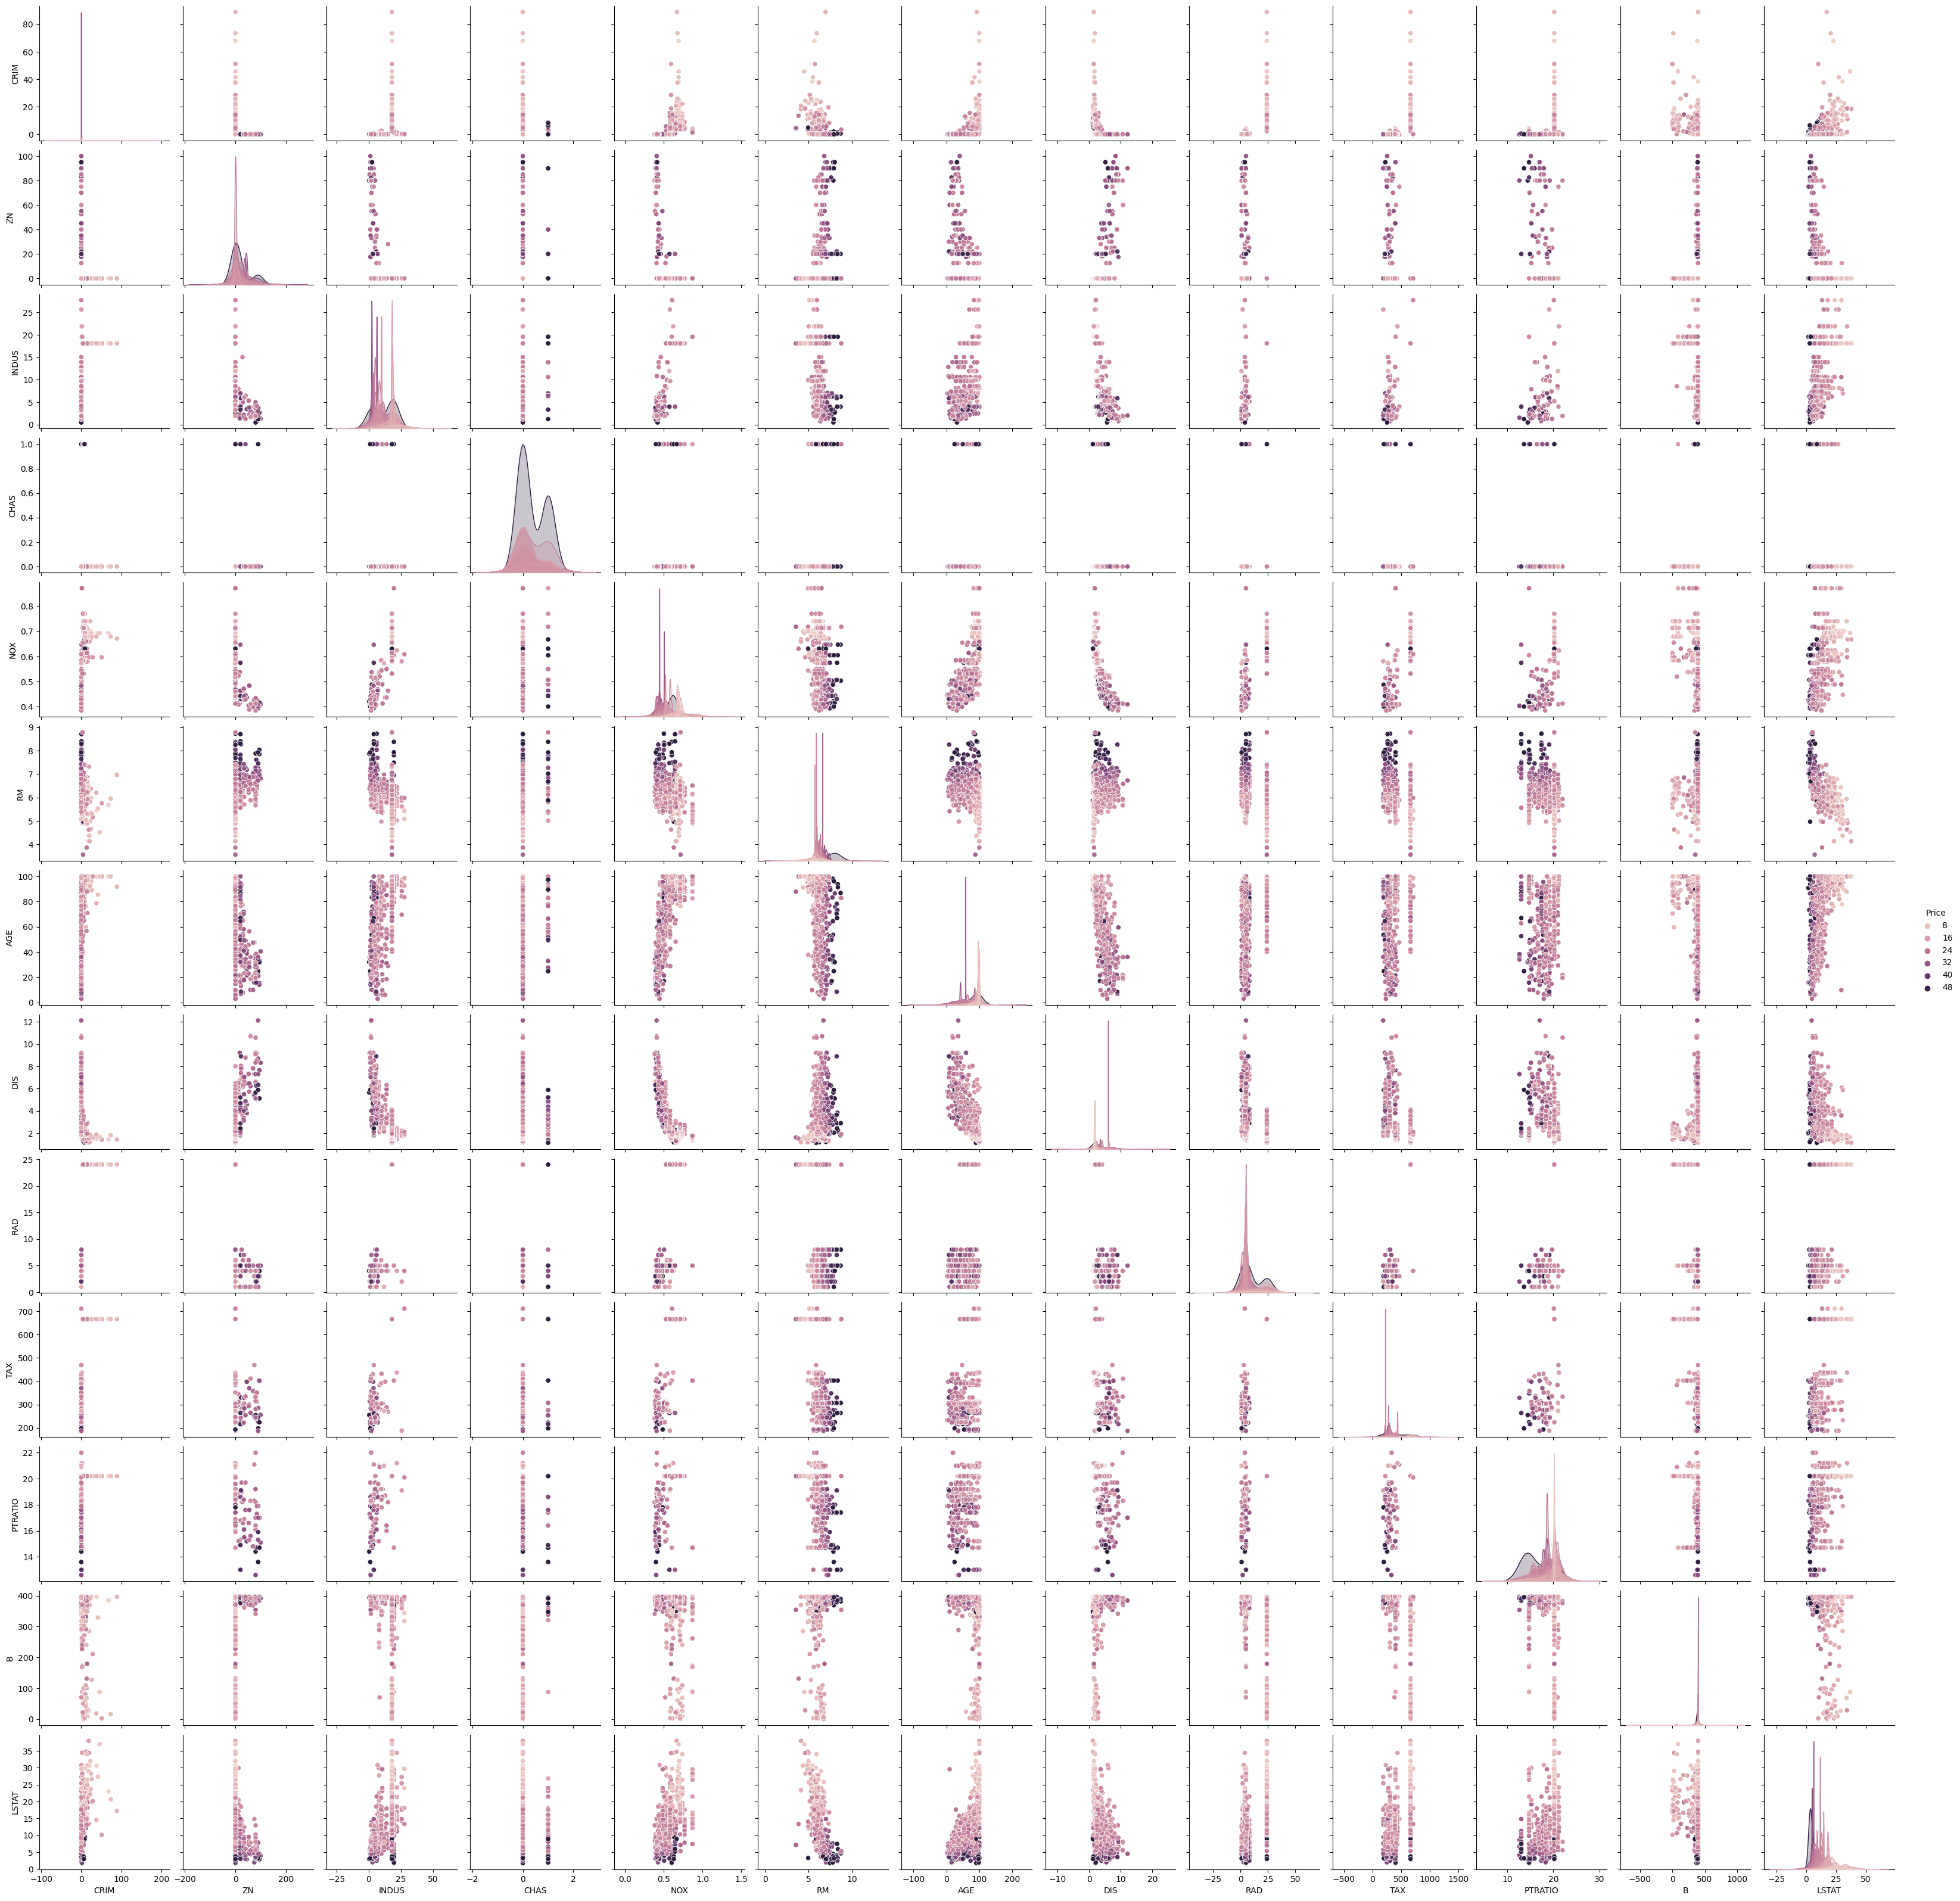

In [54]:
# Create a pairplot of the dataset
#sns.pairplot(dataset)
sns.pairplot(dataset, hue='Price')

# Display the plot
plt.show()



## Analyzing The Correlated Features

In [55]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


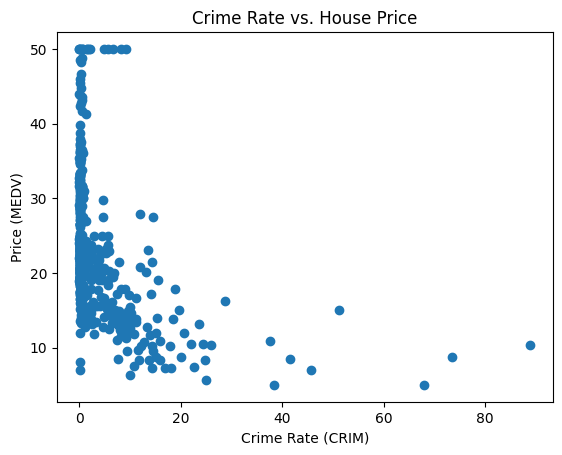

In [56]:
# Scatter plot between Crime Rate and Price
plt.scatter(dataset['CRIM'], dataset['Price'])

# Adding labels and title
plt.xlabel("Crime Rate (CRIM)")
plt.ylabel("Price (MEDV)")

# Display the plot
plt.title("Crime Rate vs. House Price")
plt.show()

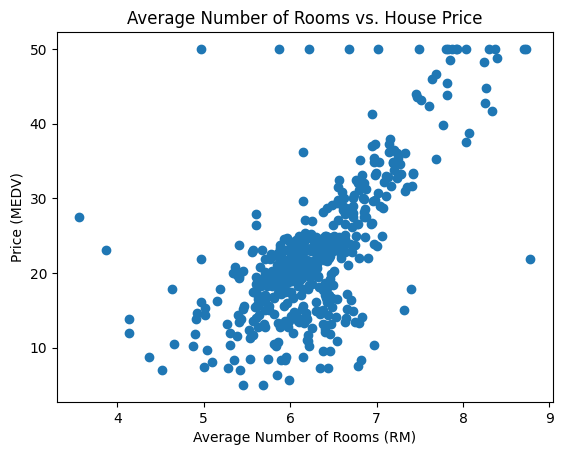

In [57]:
# Scatter plot between RM (average number of rooms) and Price
plt.scatter(dataset['RM'], dataset['Price'])

# Adding labels and title
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Price (MEDV)")

# Display the plot
plt.title("Average Number of Rooms vs. House Price")
plt.show()


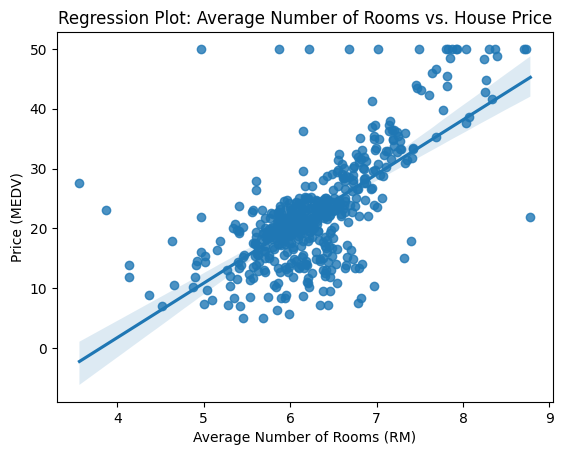

In [58]:
# Create a regression plot between RM and Price
sns.regplot(x="RM", y="Price", data=dataset)

# Adding labels and title
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Price (MEDV)")
plt.title("Regression Plot: Average Number of Rooms vs. House Price")

# Display the plot
plt.show()


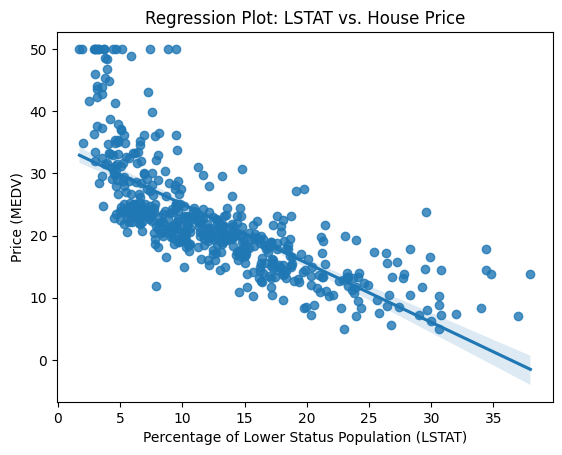

In [59]:
# Create a regression plot between LSTAT and Price
sns.regplot(x="LSTAT", y="Price", data=dataset)

# Adding labels and title
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Price (MEDV)")
plt.title("Regression Plot: LSTAT vs. House Price")

# Display the plot
plt.show()


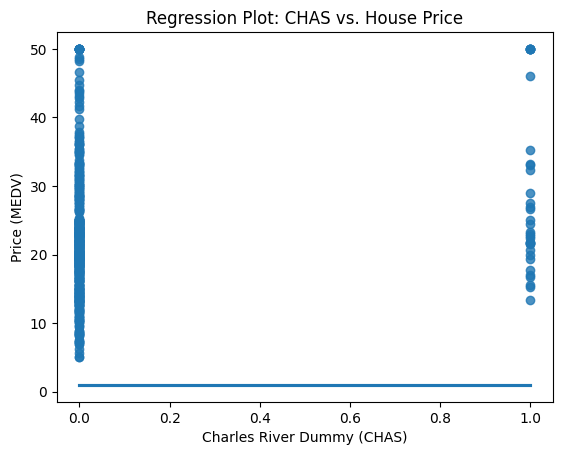

In [60]:
# Create a regression plot between CHAS and Price
sns.regplot(x="CHAS", y="Price", data=dataset, logistic=True)
plt.xlabel("Charles River Dummy (CHAS)")
plt.ylabel("Price (MEDV)")
plt.title("Regression Plot: CHAS vs. House Price")
plt.show()

# sns.scatterplot(x="CHAS", y="Price", data=dataset)
# plt.xlabel("Charles River Dummy (CHAS)")
# plt.ylabel("Price (MEDV)")
# plt.title("Scatter Plot: CHAS vs. House Price")
# plt.show()


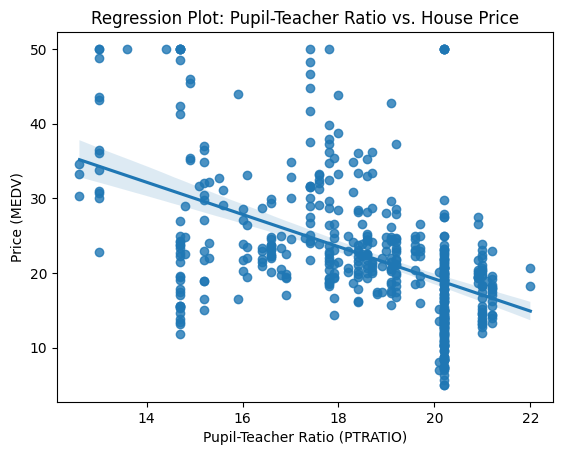

In [61]:
# Create a regression plot between PTRATIO and Price
sns.regplot(x="PTRATIO", y="Price", data=dataset)

# Adding labels and title
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Price (MEDV)")
plt.title("Regression Plot: Pupil-Teacher Ratio vs. House Price")

# Display the plot
plt.show()


In [62]:
# Independent features (all columns except the last one)
X = dataset.iloc[:, :-1]

# Dependent feature (the last column, which is Price)
y = dataset.iloc[:, -1]


In [63]:
# Display the first few rows of the independent features (X)
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [64]:
# Display the target variable (Price)
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X and y are the features and target variable you defined earlier.
# test_size=0.3: This means 30% of the data will be used for testing, and the remaining 70% will be used for training the model.
# random_state=42: This ensures the split is reproducible. Using the same random_state value will give the same split every time you run the code.

# X_train: 70% of the data (independent features) used to train the model.
# X_test: 30% of the data (independent features) used to test the model.
# y_train: 70% of the target variable (Price) corresponding to the training data.
# y_test: 30% of the target variable (Price) corresponding to the test data.

In [66]:
# Display the first few rows of the training data (X_train)
X_train
#X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [67]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22


In [68]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)


In [69]:
# Transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)


In [70]:
import pickle
# Save the scaler object to a file
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [71]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [72]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22


## Model Training

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
regression=LinearRegression()

In [75]:
# Train the regression model
#regression.fit(X_train,y_train)
# Train the model on the scaled training data
regression.fit(X_train_scaled, y_train)


LinearRegression()

In [76]:
# Predict on the scaled test data
y_pred = regression.predict(X_test_scaled)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 21.51744423117721
R-squared (R²): 0.7112260057484932


In [78]:
## print the coefficients and the intercept
#print(regression.coef_)

# Print the coefficients
print("Coefficients: ", regression.coef_)

# Print the intercept
#print("Intercept: ", regression.intercept_)


Coefficients:  [-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [79]:
print(regression.intercept_)

23.01581920903955


In [80]:
## on which parameters the model has been trained
 #regression.get_params()

# Get the parameters of the regression model
print(regression.get_params())


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [81]:
### Prediction With Test Data
#reg_pred=regression.predict(X_test)
# Predict using the standardized test data
reg_pred = regression.predict(X_test_scaled)


In [82]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

## Assumptions

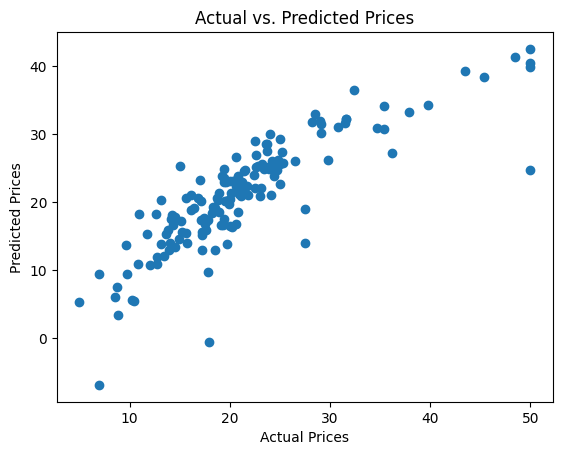

In [83]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, reg_pred)
plt.title("Actual vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


# plt.scatter(y_test, reg_pred): This creates a scatter plot where the x-axis represents the actual house prices (y_test) and the y-axis represents the predicted house prices (reg_pred).
# plt.title("Actual vs. Predicted Prices"): The title of the scatter plot.
# plt.xlabel("Actual Prices") and plt.ylabel("Predicted Prices"): Labels for the x and y-axes.
# This scatter plot helps you visually assess how well the model is performing by comparing actual and predicted prices.

In [84]:
# Calculate the residuals
residuals = y_test - reg_pred



# The residuals represent the differences between the actual values (y_test) and the predicted values (reg_pred). 
# This is a key metric in regression analysis, as it helps to identify how well the model is fitting the data. 
# Residuals can be analyzed to assess the model’s accuracy and to detect any patterns that might suggest a need for model improvements.

In [85]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

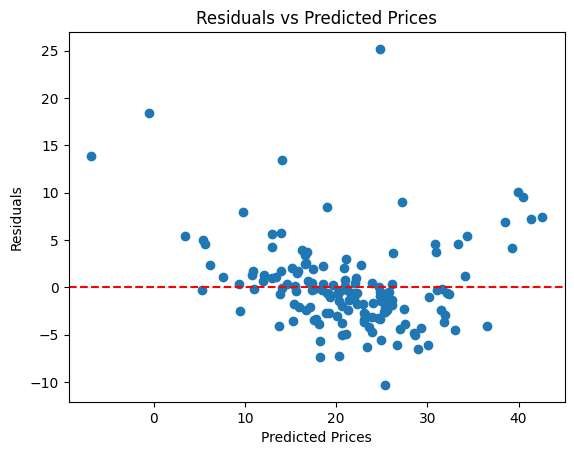

In [86]:
# Plot residuals vs. predicted values
plt.scatter(reg_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title("Residuals vs Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()

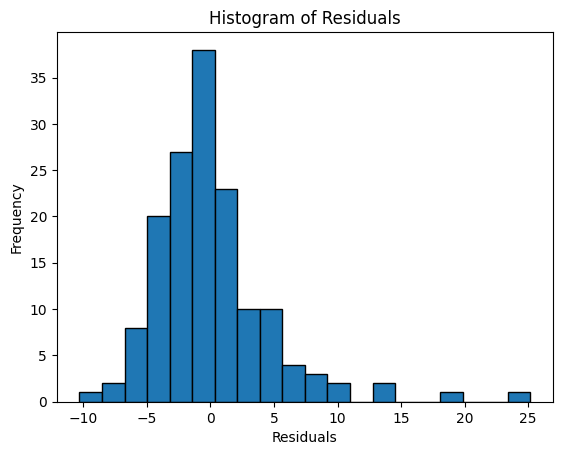

In [87]:
# Plot histogram of residuals
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

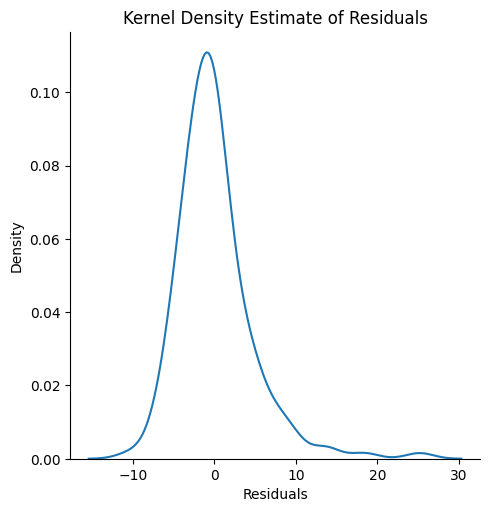

In [88]:
# Plot the residuals using a KDE plot
sns.displot(residuals, kind="kde")
plt.title("Kernel Density Estimate of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()


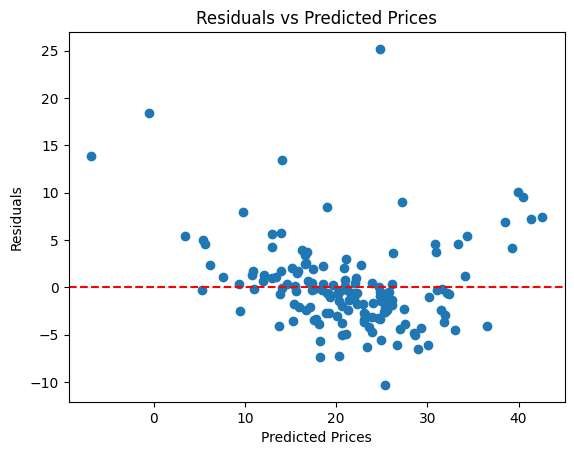

In [89]:
# Scatter plot of predicted values vs. residuals
plt.scatter(reg_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y = 0
plt.title("Residuals vs Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()


# If the residuals are randomly scattered around the horizontal line at zero (with no discernible pattern), it suggests that the model is a good fit.
# A non-random pattern (e.g., funnel shape, increasing spread of residuals as predicted values increase) may indicate heteroscedasticity, 
# where the variance of residuals changes as the predicted values increase.


In [90]:
# print(mean_absolute_error(y_test,reg_pred))
# print(mean_squared_error(y_test,reg_pred))
# print(np.sqrt(mean_squared_error(y_test,reg_pred)))
# Calculating three important metrics to evaluate the performance of our linear regression model:
# Mean Absolute Error (MAE): This gives you the average of the absolute differences between the actual and predicted values, 
# showing how far off your predictions are on average.
# Mean Squared Error (MSE): This measures the average of the squared differences between the actual and predicted values.
# It penalizes larger errors more than smaller ones.
# Root Mean Squared Error (RMSE): This is the square root of the MSE, providing a measure of error in the same unit as the target variable.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, reg_pred)
print(f"Mean Absolute Error (MAE): {mae}")
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, reg_pred)
print(f"Mean Squared Error (MSE): {mse}")
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# MAE: Tells you the average error in the units of the target variable.
# MSE: The squared error, which is more sensitive to larger errors.
# RMSE: The square root of MSE, which gives you an error estimate in the same scale as the original target variable (useful for interpretation).
# These metrics will help us assess how well the model is performing. Smaller values indicate better model performance.

Mean Absolute Error (MAE): 3.1627098714574053
Mean Squared Error (MSE): 21.51744423117721
Root Mean Squared Error (RMSE): 4.6386899261728205


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [91]:
from sklearn.metrics import r2_score
# Calculate R-squared score
score = r2_score(y_test, reg_pred)
print(f"R-squared (R²): {score}")

# The R-squared (R²) score is a metric that indicates how well the model explains the variance in the target variable. 
# An R² value closer to 1 means the model explains a high proportion of the variance, 
# while a value closer to 0 suggests that the model does not explain much variance.

# R² = 1: Perfect prediction. The model explains all the variance in the target variable.
# R² = 0: The model doesn't explain any of the variance.
# R² < 0: The model is worse than a horizontal line (predicting the mean of the target variable).
# In general, a higher R² score is better, but this can vary depending on the problem we're working on.

R-squared (R²): 0.7112260057484932


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [92]:
#display adjusted R-squared
#1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of test data points
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")


Adjusted R-squared: 0.6840226584639308


## New Data Prediction

In [93]:
# Reshape the first data sample from boston_df into a 2D array
sample_reshaped = boston_df.iloc[0].values.reshape(1, -1)
print(sample_reshaped)




[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]]


In [94]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [95]:
print(boston_df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [99]:

# Apply the transformation to the first row with feature names
#scaled_sample = scaler.transform(features.iloc[0].values.reshape(1, -1))
# Print the scaled sample
#print(scaled_sample)


# Exclude the target column 'MEDV' to define features
features = boston_df.drop(columns=["MEDV"])
# Apply the transformation to the first row with feature names
scaled_sample = scaler.transform(features.iloc[0].values.reshape(1, -1))

# Print the scaled sample
print(scaled_sample)


[[-0.41709233  0.29216419 -1.27338003 -0.28154625 -0.16513629  0.34715902
  -0.13030059  0.15267164 -0.97798895 -0.66777595 -1.32142483  0.42854113
  -1.04769976]]


In [100]:
from sklearn.preprocessing import StandardScaler

# Example: Fit the scaler
scaler = StandardScaler()
scaler.fit(features)  # Fit on the features (excluding the target column)

StandardScaler()

In [101]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [102]:
# Extract the feature values (excluding the target column 'MEDV')
features = boston_df.drop('MEDV', axis=1)

# Select the first row of the feature values (this corresponds to the first data point)
first_data_sample = features.iloc[0].values.reshape(1, -1)

# Apply the scaling transformation to the selected data sample
scaled_sample = scaler.transform(first_data_sample)

# Predict the target value (house price) using the regression model
predicted_price = regression.predict(scaled_sample)

# Print the predicted price
print(predicted_price)

[30.66719329]


In [103]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Pickling The Model file For Deployment

In [104]:
import pickle

In [105]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [106]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [107]:
## Prediction
# Exclude the target variable 'MEDV' and scale only the feature columns
features = boston_df.drop('MEDV', axis=1)

# Reshape the first data point and apply scaling
scaled_sample = scaler.transform(features.iloc[0].values.reshape(1, -1))

# Make prediction using the unpickled model
predicted_price = pickled_model.predict(scaled_sample)

# Print the predicted price
print(predicted_price)


[30.66719329]


In [108]:
# Predict the price for multiple samples
scaled_samples = scaler.transform(features.head(5).values)  # First 5 samples
predicted_prices = pickled_model.predict(scaled_samples)
print(predicted_prices)

[30.66719329 25.40482444 31.50326637 29.45572421 28.70391509]


In [109]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [110]:

from sklearn.metrics import mean_squared_error, r2_score
# Use 'MEDV' from boston_df as the actual prices
true_values = boston_df['MEDV'].head(5).values  # Actual prices (first 5 samples)
# Calculate MSE and R^2
mse = mean_squared_error(true_values, predicted_prices)
r2 = r2_score(true_values, predicted_prices)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 28.179172359519413
R^2 Score: 0.21132135933457386


In [111]:
# Deploy the Model: If you want to make this model accessible to users (for example, in a web application), 
# you can save the model (regmodel.pkl) and scaler, and then deploy them. There are many ways to deploy models, including:

# Flask/Django for a Web API: Create a web interface that allows users to input features and get predictions in real time.
# Streamlit: Create a simple and interactive app where you can input features and immediately see predictions.
# FastAPI: A fast web framework for deploying machine learning models.
# Evaluate the Model's Performance Over Time: If you're working in a production environment, 
# periodically assess how the model performs as new data comes in. If the model's performance degrades, you can retrain it with updated data.

# Model Improvement: If the performance is not satisfactory, you can try improving it by:
# Feature Engineering: Try adding or modifying features.
# Hyperparameter Tuning: Optimize the hyperparameters of your regression model.
# Trying Different Algorithms: Test with more complex models like Random Forests, Gradient Boosting, or even neural networks if you want to go deeper.